In [1]:
import numpy as np
import pandas as pd
from IPython.display import display 
%matplotlib inline
Data = pd.read_csv('C:/Users/user/Desktop/WorkAssign/PreScreen_r3/palm_ffb.csv')

In [2]:
Data.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [3]:
#Ignore the Date column as the focus on external factors

Df = Data.iloc[:,1:]

In [4]:
Df.head()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [5]:
Df.describe() #Summary Statistic of the palm data

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [8]:
import pingouin as pg
corr = pg.pairwise_corr(Df, columns=[['FFB_Yield'], ['SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp', 'Precipitation','Working_days','HA_Harvested']], method='pearson')
corr.sort_values(by=['p-unc'])[['X', 'Y', 'n', 'r', 'p-unc']].head()

,X,Y,n,r,p-unc
6,FFB_Yield,HA_Harvested,130,-0.350,0.000044
4,FFB_Yield,Precipitation,130,0.290,0.000832
5,FFB_Yield,Working_days,130,0.116,0.187362
2,FFB_Yield,Min_Temp,130,0.104,0.239760
3,FFB_Yield,Max_Temp,130,-0.071,0.420821


Form this pairwise correlation, one-vs-all correlation has been used to study all external factors correlation against FFB_yield. The general rule is that you can reject the hypothesis that the two variables are not correlated if the p-value is below 0.05, which is the case. We can therefore say that there is a significant correlation between the all the variables against FFB_yield.

In [14]:
Df.corr().round(2) # Convert the Data into a correlation matrix

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,1.00,-0.65,0.02,-0.50,0.55,-0.06,-0.33,-0.00
Average_Temp,-0.65,1.00,0.18,0.76,-0.37,0.08,0.45,-0.01
Min_Temp,0.02,0.18,1.00,-0.12,0.35,0.07,0.02,0.10
Max_Temp,-0.50,0.76,-0.12,1.00,-0.46,-0.04,0.31,-0.07
Precipitation,0.55,-0.37,0.35,-0.46,1.00,0.13,-0.27,0.29
Working_days,-0.06,0.08,0.07,-0.04,0.13,1.00,0.05,0.12
HA_Harvested,-0.33,0.45,0.02,0.31,-0.27,0.05,1.00,-0.35
FFB_Yield,-0.00,-0.01,0.10,-0.07,0.29,0.12,-0.35,1.00


Text(0.5, 1.0, 'Correlation matrix')

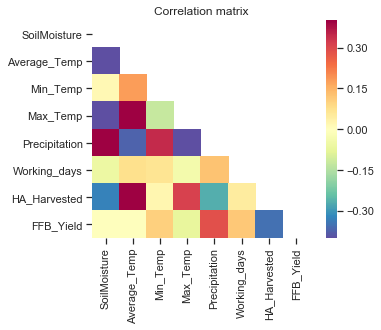

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
corrs = Df.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

• Warm colors (red) in heatmap indicate a positive correlation, cool colors (blue) indicate a negative correlation.

• FFB_Yield has strong negative correlation with HA_Harvested

• FFB_Yield has strong positive correlation with Precipitation

• FFB_Yield has strong moderate correlation with Working days

• FFB_Yield has weaker positive correlation with Max_Temp and Min_Temp